## Requirements

Since we want to work interactively with `sympy`, we will import the complete module. Note that this polutes the namespace, and is not recommended in general.

In [29]:
from sympy import init_printing
from sympy import symbols

Enable pretty printing in this notebook.

In [17]:
init_printing()

Linear algebra

## Linear algebra

In [ ]:
from sympy.solvers import solve

You can use sympy to solve equations and sets of linear equations.

In [18]:
x, y, z = symbols('x, y, z')

### Solving equations

In [19]:
solve(3*x**2 - 7*x + 5, x)

### Solving sets of linear equations

In [20]:
solve([
    3*x + 5*y - z/2 - 5,
    -x + 3*y + 5*z -3,
    4*x - 7*y + 2*z - 1,
], [x, y, z])

### Vectors and matrices

In [80]:
from sympy import Matrix
from sympy import MatrixSymbol

In [54]:
A = Matrix([
    [3, 5, -1],
    [2, 5, 4],
])

In [55]:
B = Matrix([
    [-3, 2, 6],
    [3, 7, 4],
])

In [56]:
A + B

Matrix([
[0,  7, 5],
[5, 12, 8]])

In [57]:
A.shape

In [58]:
A[0, 1]

In [60]:
A[:, 2]

Matrix([
[-1],
[ 4]])

In [61]:
A.col(0)

Matrix([
[3],
[2]])

In [65]:
x = Matrix([[2, -5, 3]])

In [66]:
A*x.transpose()

Matrix([
[-22],
[ -9]])

In [69]:
C = Matrix([
    [3, 2],
    [-3, 9],
    [2, 0],
])

In [70]:
A*C

Matrix([
[-8, 51],
[-1, 49]])

In [72]:
a, b, c, d = symbols('a, b, c, d')

In [73]:
D = Matrix([
    [a, b],
    [c, d],
])

In [74]:
D**2

Matrix([
[a**2 + b*c,  a*b + b*d],
[ a*c + c*d, b*c + d**2]])

In [77]:
D.det()

In [78]:
D.inv()

Matrix([
[ d/(a*d - b*c), -b/(a*d - b*c)],
[-c/(a*d - b*c),  a/(a*d - b*c)]])

In [82]:
E = MatrixSymbol('E', 2, 2)

In [84]:
E[0, 1]

### Eigen values and eigen vectors

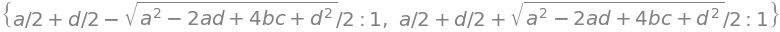

In [75]:
D.eigenvals()

In [76]:
D.eigenvects()

[(a/2 + d/2 - sqrt(a**2 - 2*a*d + 4*b*c + d**2)/2, 1, [Matrix([
[-d/c + (a/2 + d/2 - sqrt(a**2 - 2*a*d + 4*b*c + d**2)/2)/c],
[                                                         1]])]), (a/2 + d/2 + sqrt(a**2 - 2*a*d + 4*b*c + d**2)/2, 1, [Matrix([
[-d/c + (a/2 + d/2 + sqrt(a**2 - 2*a*d + 4*b*c + d**2)/2)/c],
[                                                         1]])])]

In [ ]:
from sympy.

## Expression manipulation

In [47]:
from sympy.core.add import Add
from sympy.core.mul import Mul
from sympy.core.mul import Pow
from sympy import factor
from sympy import log

Define a number of symbols to work with, as well as an example expression.

In [21]:
x, y, a, b, c = symbols('x y a b c')

In [22]:
expr = (a*x**2 - b*y**2 + 5)/(c*x + y)

Check the expression's type.

In [23]:
expr.func

sympy.core.mul.Mul

Although the expression was defined as a divisino, it is represented as a multiplicatino by `sympy`.  The `args` attribute of an expressions stores the operands of the top-level operator.

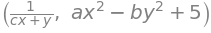

In [24]:
expr.args

Although the first factor appears to be a division, it is in fact a power.  The denominator of this expression would be given by:

In [25]:
expr.args[0].func

sympy.core.power.Pow

In [26]:
expr.args[0].args[0]

The expression $\frac{1}{a x + b}$ can alternatively be defined as follows, which highlights the internal representation of expressions.

In [33]:
expr = Pow(Add(Mul(a, x), b), -1)

In [34]:
pprint(expr)

Pretty printing has been turned OFF


In [35]:
expr.args

In [36]:
expr.args[0].args[0]

This may be a bit surprising when you look at the mathematical representation of the expression, but the order of the terms is different from its rendering on the screen.

In [37]:
expr.args[0].args

Since the addition operation is commutative, this makes no difference mathematically.

In [38]:
expr.args[0].args[1].args

In [39]:
expr = x**2 + 2*a*x + y**2

In [40]:
expr2 = expr.subs(y, a)
expr2

Most expression manipulation algorithms can be called as functions, or as methods on expressions.

In [43]:
factor(expr2)

In [44]:
expr2.factor()

In [45]:
x, y = symbols('x y', positive=True)

In [48]:
(log(x) + log(y)).simplify()

## Calculus

### Series expansion

In [77]:
x, a = symbols('x a')

In [78]:
expr = sin(a*x)/x

In [79]:
expr2 = series(expr, x, 0, n=7)

In [80]:
expr2

A term of a specific order in a given variable can be selected easily.

In [81]:
expr2.taylor_term(2, x)

When the order is unimportant, or when the expression should be used to define a function, the order term can be removed.

In [82]:
expr2.removeO()

Adding two series deals with the order correctly.

In [83]:
s1 = series(sin(x), x, 0, n=7)

In [84]:
s2 = series(cos(x), x, 0, n=4)

In [85]:
s1 + s2

### Derivatives and integrals

In [49]:
expr = a*x**2 + b*x + c

In [50]:
expr.diff(x)

In [51]:
expr.integrate(x)

### Solving differential equations

In [94]:
from sympy import Derivative
from sympy import Eq
from sympy import Function
from sympy import Symbol
from sympy.solvers.ode import dsolve

In [95]:
x = symbols('x')
f_0 = Symbol('f_0', positive=True)
f = Function('f')

In [98]:
f = dsolve(Derivative(f(x), x, x) + f_0**2*f(x), f(x))

In [99]:
f(12)

TypeError: 'Equality' object is not callable